In [2]:
from modules.utils import *

In [5]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 15})

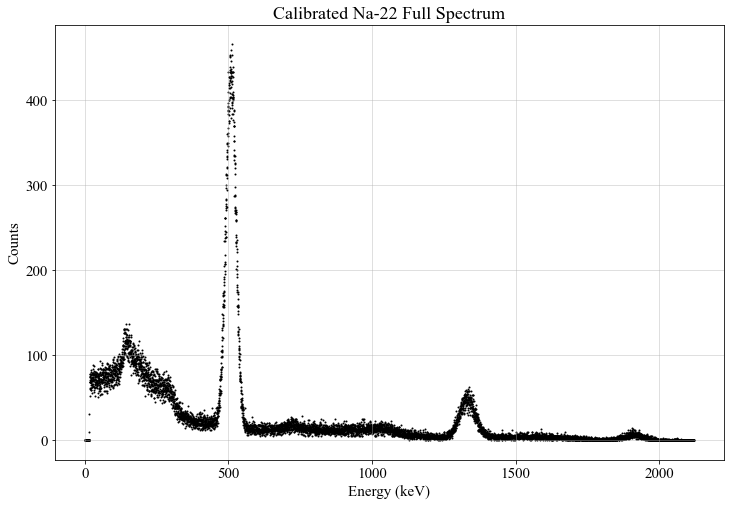

In [6]:
plt.title("Calibrated Na-22 Full Spectrum")
plot_MCA('left_Na_1', True, 511)

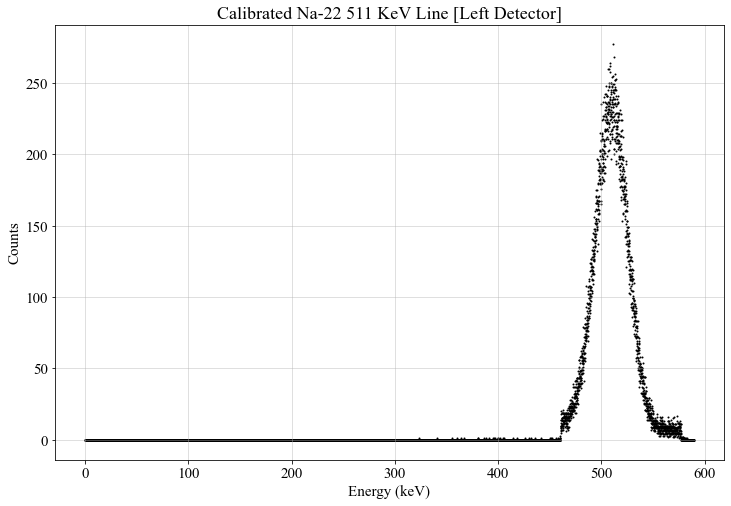

In [9]:
plt.title("Calibrated Na-22 511 KeV Line [Left Detector]")
plot_MCA('left_Na_2_withSCAadjustment', True, 511)

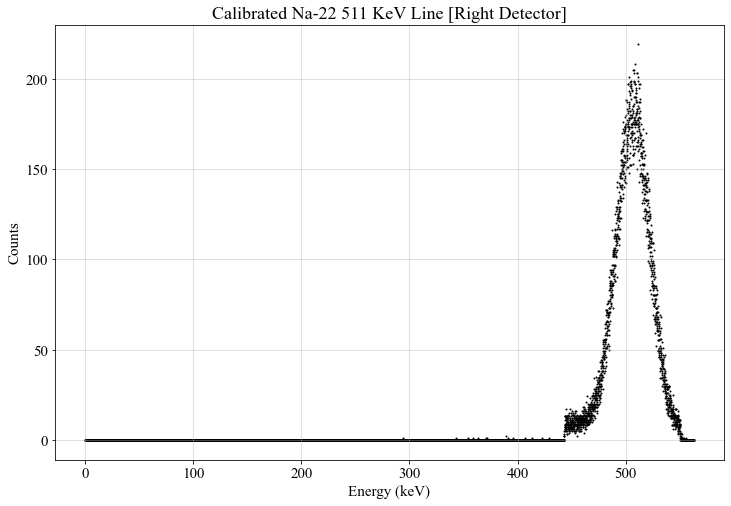

In [11]:
plt.title("Calibrated Na-22 511 KeV Line [Right Detector]")
plot_MCA('right_Na_2_withSCAadjustment', True, 511)

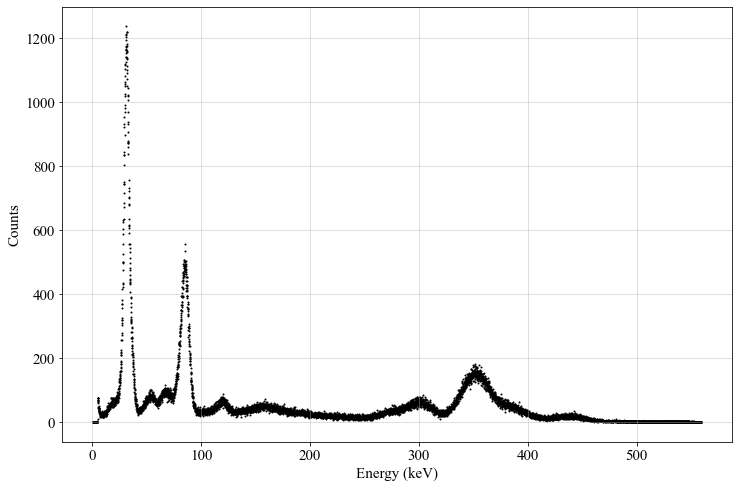

In [12]:
plot_MCA('Ba_Full_Spectrum', True, 31)